# Convolutional Neural Networks

We will be working with the cifar-10 dataset. This dataset has images from 10 different classes with images that are 32x32

The images belong to the following classes: 

<li> airplane
<li> automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck

Here is a link to the dataset: https://www.cs.toronto.edu/~kriz/cifar.html

#### Importing the libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

#### Loading the data, but shuffled

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

***The 32 by 32 by 3 is the color images***

In [5]:
print(X_train.shape[0], 'total images for the training data')
print(X_test.shape[0], 'total images for the test data')

50000 total images for the training data
10000 total images for the test data


#### Printing a Image

[5]


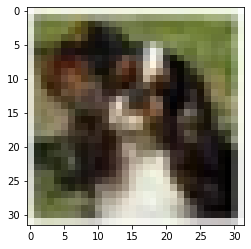

In [6]:
print(y_train[500])
plt.imshow(X_train[500])

***This is a dog image, although hard to see***

#### Encoding the data (OneHotEncoding)

In [7]:
classes = 10
y_train = keras.utils.to_categorical(y_train, classes) 
y_test = keras.utils.to_categorical(y_test, classes)

In [8]:
print(y_train[500])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


***If you noticed, y_test is now a vector of 0 and 1 instead of a number between 0-9. This will help us when we are using our Neural Network***

#### Scaling

***We need to scale all values so that they are between 0 and 1 because our neural networks require inputs that are scaled. The
best way to do this, is to divide each value in X_train by 255 since all rgb values range from 0-255. This will ensure all of our values
are between 0 and 1***

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

#### CNN Layers

There are three layers to the CNN which I will add. This will be a convolutional layer, MaxPooling, and then flattening the image

#### 1. Convolutional: 
#### 2. MaxPooling: 
#### 3. Flattening: 

#### Building a CNN with: a 5 by 5 convolution, 2 by 2 stride, and 32 filters

***Adding our first 5X5 convolution layer***

In [12]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

***Adding our second 5X5 convolution layer***

In [13]:
model.add(Conv2D(32, (5, 5), strides = (2,2)))
model.add(Activation('relu'))

***Applying Max pooling and a droput for regularization***

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

***Flattening the image to make it one dimensional, then adding more dropout, then finally a activation neuron to classifiy the image***

In [15]:
model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

#### Compiling the Neuron

In [17]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

#### Fitting the model (Training)

In [18]:
model.fit(X_train, y_train,batch_size=batch_size,epochs=2,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 17s 10ms/step - loss: 1.7296 - accuracy: 0.3689 - val_loss: 1.4874 - val_accuracy: 0.4461
Epoch 2/2
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4498 - accuracy: 0.4765 - val_loss: 1.5316 - val_accuracy: 0.4747


In [19]:
import numpy as np
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [20]:
np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test, axis=1), classes_x)

0.4747

#### Lets now build a more complex model and see if we can improve our results

In [21]:
model2 = Sequential()

#### Creating out First layer convolutional layer

In [22]:
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#### Creating out Second layer convolutional layer

In [23]:
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#### Flattening then fully connecting the network

In [24]:
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(classes))
model2.add(Activation('softmax'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

#### Compiling the neuron

In [26]:
opt2 = keras.optimizers.RMSprop(learning_rate=0.0005)
model2.compile(loss='categorical_crossentropy',optimizer=opt2,metrics=['accuracy'])

#### Training

In [27]:
batch_size=32
model2.fit(X_train, y_train,batch_size=batch_size,epochs=2,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 144s 92ms/step - loss: 1.5588 - accuracy: 0.4351 - val_loss: 1.2424 - val_accuracy: 0.5612
Epoch 2/2
1563/1563 [==============================] - 117s 75ms/step - loss: 1.1456 - accuracy: 0.5972 - val_loss: 1.0507 - val_accuracy: 0.6378


#### Making predictions

In [28]:
predict_x=model2.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 12ms/step


In [29]:
np.argmax(y_test, axis=1)
accuracy_score(np.argmax(y_test, axis=1), classes_x)

0.6378

#### Lets make a third model, but this time very complex

In [30]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(classes))
model3.add(Activation('softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [31]:
opt3 = keras.optimizers.RMSprop(learning_rate=0.0005)
model3.compile(loss='categorical_crossentropy',optimizer=opt3,metrics=['accuracy'])

batch_size=32
model3.fit(X_train, y_train,batch_size=batch_size,epochs=2,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 124s 78ms/step - loss: 1.7123 - accuracy: 0.3644 - val_loss: 1.5705 - val_accuracy: 0.4516
Epoch 2/2
1563/1563 [==============================] - 133s 85ms/step - loss: 1.3161 - accuracy: 0.5265 - val_loss: 1.1040 - val_accuracy: 0.6053


In [32]:
predict_x=model3.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

np.argmax(y_test, axis=1)
accuracy_score(np.argmax(y_test, axis=1), classes_x)

313/313 [==============================] - 4s 12ms/step


0.6053

#### Summary: We got the best performance when we had only two layers for our CNN. From here, we could hypertune even more if we wanted by adjusting the dropout rate, activation, strides, pooling, etc. 